In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import time

In [0]:
train_file = "./sample_data/mnist_train_small.csv"
test_file = "./sample_data/mnist_test.csv"
output_file = "submission.csv"
time.clock()

2.171736

In [0]:
input_data = np.loadtxt(train_file,skiprows = 1 , dtype = 'int' , delimiter = ',')

In [0]:
input_data.shape

(19999, 785)

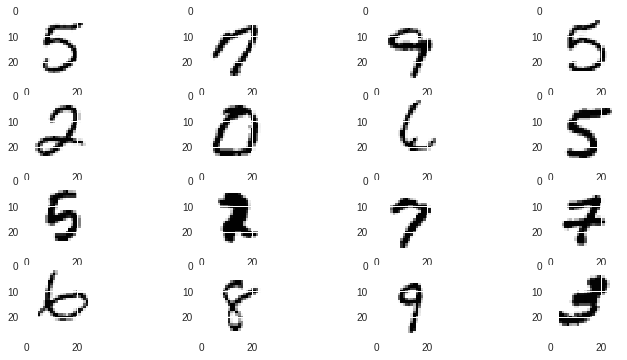

In [0]:
fig,ax = plt.subplots(4,4,figsize = (12,6))
for i,j in enumerate(ax.flat):
  j.imshow(input_data[i,1:].reshape(28,28))



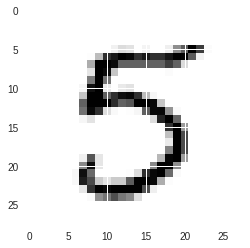

In [0]:
plt.imshow(input_data[0,1:].reshape(28,28))
plt.show()

Text(0.5, 1.0, '28 X 28')

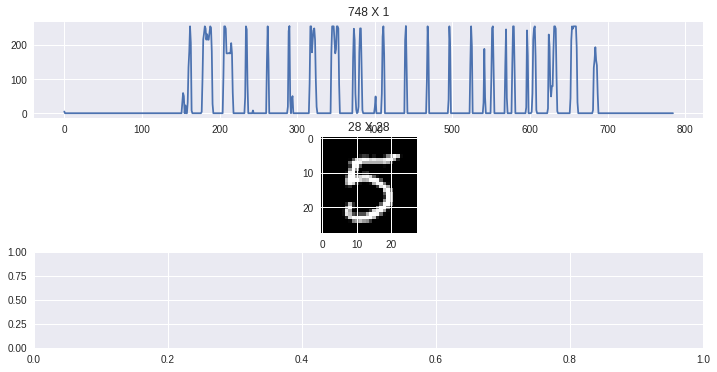

In [0]:

fig,ax = plt.subplots(3,1,figsize = (12,6))
ax[0].plot(input_data[0,0:])
ax[0].set_title("748 X 1")
ax[1].imshow(input_data[0,1:].reshape(28,28),cmap = 'gray')
ax[1].set_title("28 X 28")




In [0]:
X_data = input_data[:,1:]

Y_data = input_data[:,0]


train_x,val_x,train_y,val_y = train_test_split(X_data,Y_data,test_size = 0.1)

In [0]:
print("tarin_data {}".format(train_x.shape))
print("test_data {}".format(val_x.shape))
print("X_data {}".format(X_data.shape))
print("Y_data {}".format(Y_data.shape))
print("y_train {}".format(train_y.shape))
print("y_val {}".format(val_y.shape))


tarin_data (17999, 784)
test_data (2000, 784)
X_data (19999, 784)
Y_data (19999,)
y_train (17999,)
y_val (2000,)


In [0]:
# reshaping  -1 allows us to insput n num. of images .

train_x = train_x.reshape(-1,28,28,1)
val_x = val_x.reshape(-1,28,28,1)

In [0]:
# to make the net converge faster .

train_x = train_x.astype("float32")/255.
val_x = val_x.astype("float32")/255.


train_x.shape

(17999, 28, 28, 1)

In [0]:
# keras libraries 
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

Using TensorFlow backend.


In [0]:
## convert to categoriacal


print("Y_data {}".format(train_y[0:5]))

cat_train_y = to_categorical(train_y)

print("categorial value {}".format(cat_train_y[0:5]))

#train_y.shape

cat_val_y = to_categorical(val_y)




Y_data [9 8 0 4 9]
categorial value [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [0]:
#defining the model


model = Sequential()

model.add(Conv2D(filters = 16 , input_shape = (28,28,1),kernel_size = (3,3),activation = 'relu' , name = 'mul'))

# learn more abt batch normalization

model.add(BatchNormalization())


model.add(Conv2D(filters = 16 , kernel_size = (3,3) , activation = 'relu'))

model.add(MaxPool2D(strides = (2,2)))

model.add(Dropout(0.25))

model.add(Conv2D(filters = 32 , kernel_size = (3,3) , activation = 'relu'))

model.add(BatchNormalization())

model.add(Conv2D(filters = 32 ,kernel_size = (3,3),activation = 'relu'))

model.add(BatchNormalization())

model.add(MaxPool2D(strides = (2,2)))

model.add(Dropout(0.25))

model.add(Flatten())


model.add(Dense(512,activation = 'relu'))

model.add(Dropout(0.25))

model.add(Dense(1024,activation = 'relu'))

model.add(Dropout(0.5))

model.add(Dense(10,activation = 'sigmoid',name = 'final_result'))


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
# augmentatioon

datagen = ImageDataGenerator(zoom_range = 0.1,
                            height_shift_range = 0.1,
                            width_shift_range = 0.1,
                            rotation_range = 10)





In [0]:
# compiing the model

model.compile(loss = 'categorical_crossentropy',optimizer = "sgd" ,\
metrics =['accuracy'])

In [0]:
## new thing changing the leaning rate while traiing

annealer = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)


In [0]:
'''hist = model.fit_generator(datagen.flow(train_x, cat_train_y, batch_size=100),
                           epochs=20, #Increase this when not on Kaggle kernel
                           verbose=2,  #1 for ETA, 0 for silent
                           validation_data=(val_x, cat_val_y), #For speed
                           )
'''


hist1 = model.fit(train_x,cat_train_y,batch_size = 16,validation_data = (val_x,cat_val_y) , epochs = 10,verbose = 1)
        

Instructions for updating:
Use tf.cast instead.
Train on 17999 samples, validate on 2000 samples
Epoch 1/10
17999/17999 [==============================] - 65s 4ms/step - loss: 0.6201 - acc: 0.7919 - val_loss: 0.1248 - val_acc: 0.9595
Epoch 2/10
17999/17999 [==============================] - 67s 4ms/step - loss: 0.1694 - acc: 0.9478 - val_loss: 0.0833 - val_acc: 0.9745
Epoch 3/10
17999/17999 [==============================] - 68s 4ms/step - loss: 0.1273 - acc: 0.9610 - val_loss: 0.0603 - val_acc: 0.9805
Epoch 4/10
17999/17999 [==============================] - 70s 4ms/step - loss: 0.1085 - acc: 0.9654 - val_loss: 0.0607 - val_acc: 0.9805
Epoch 5/10
17999/17999 [==============================] - 72s 4ms/step - loss: 0.0947 - acc: 0.9702 - val_loss: 0.0471 - val_acc: 0.9840
Epoch 6/10
17999/17999 [==============================] - 72s 4ms/step - loss: 0.0832 - acc: 0.9745 - val_loss: 0.0486 - val_acc: 0.9835
Epoch 7/10
17999/17999 [==============================] - 71s 4ms/step - loss: 0.

In [0]:
# trainig model with decaying learning rate


hist2 = model.fit(train_x,cat_train_y,batch_size = 100,validation_data = (val_x,cat_val_y) ,
                  epochs =20 ,verbose = 1,callbacks = [annealer])

Train on 17999 samples, validate on 2000 samples
Epoch 1/20
17999/17999 [==============================] - 42s 2ms/step - loss: 0.0527 - acc: 0.9821 - val_loss: 0.0361 - val_acc: 0.9880
Epoch 2/20
17999/17999 [==============================] - 41s 2ms/step - loss: 0.0502 - acc: 0.9833 - val_loss: 0.0350 - val_acc: 0.9890
Epoch 3/20
17999/17999 [==============================] - 42s 2ms/step - loss: 0.0487 - acc: 0.9841 - val_loss: 0.0345 - val_acc: 0.9895
Epoch 4/20
17999/17999 [==============================] - 42s 2ms/step - loss: 0.0478 - acc: 0.9846 - val_loss: 0.0342 - val_acc: 0.9895
Epoch 5/20
17999/17999 [==============================] - 41s 2ms/step - loss: 0.0484 - acc: 0.9843 - val_loss: 0.0340 - val_acc: 0.9895
Epoch 6/20
17999/17999 [==============================] - 42s 2ms/step - loss: 0.0471 - acc: 0.9849 - val_loss: 0.0338 - val_acc: 0.9895
Epoch 7/20
17999/17999 [==============================] - 42s 2ms/step - loss: 0.0463 - acc: 0.9852 - val_loss: 0.0336 - val_acc:

KeyboardInterrupt: ignored

In [0]:
# training model with augmented data
hist3 = model.fit_generator(datagen.flow(train_x, cat_train_y),
                            
                           epochs=10, #Increase this when not on Kaggle kernel
                           verbose=1,  #1 for ETA, 0 for silent
                           validation_data=(val_x, cat_val_y), #For speed
                           callbacks=[annealer])

In [0]:
#trying out adam optiizer


model.compile(loss = "categorical_crossentropy",optimizer = Adam(lr = 1e-4) ,\
              metrics = ['accuracy'])


hist4 = model.fit_generator(datagen.flow(train_x, cat_train_y , batch_size = 16),
                           steps_per_epoch = 500,
                           epochs=20, #Increase this when not on Kaggle kernel
                           verbose=1,  #1 for ETA, 0 for silent
                           validation_data=(val_x, cat_val_y), #For speed
                           callbacks=[annealer])

Epoch 1/20
500/500 [==============================] - 37s 74ms/step - loss: 0.3743 - acc: 0.8888 - val_loss: 0.1172 - val_acc: 0.9625
Epoch 2/20
500/500 [==============================] - 35s 70ms/step - loss: 0.2344 - acc: 0.9343 - val_loss: 0.1460 - val_acc: 0.9550
Epoch 3/20
500/500 [==============================] - 35s 70ms/step - loss: 0.1959 - acc: 0.9461 - val_loss: 0.0579 - val_acc: 0.9830
Epoch 4/20
500/500 [==============================] - 35s 70ms/step - loss: 0.1669 - acc: 0.9529 - val_loss: 0.0911 - val_acc: 0.9735
Epoch 5/20
500/500 [==============================] - 35s 69ms/step - loss: 0.1603 - acc: 0.9546 - val_loss: 0.0487 - val_acc: 0.9865
Epoch 6/20
500/500 [==============================] - 35s 69ms/step - loss: 0.1465 - acc: 0.9570 - val_loss: 0.0526 - val_acc: 0.9855
Epoch 7/20
500/500 [==============================] - 34s 68ms/step - loss: 0.1281 - acc: 0.9641 - val_loss: 0.0487 - val_acc: 0.9845
Epoch 8/20
500/500 [==============================] - 34s 68ms

In [0]:
#evaluating the model

train_loss , train_acc = model.evaluate(train_x,cat_train_y,batch_size = 100)


print("train_loss {}  train_acc {}".format(train_loss,train_acc))

val_loss , val_acc = model.evaluate(val_x,cat_val_y , batch_size = 100)


print("val_loss {}  val_acc {}".format(val_loss,val_acc))



17999/17999 [==============================] - 12s 669us/step
train_loss 0.014384257159681915  train_acc 0.995721988634531
2000/2000 [==============================] - 1s 681us/step
val_loss 0.029368825396522878  val_acc 0.9915000081062317


In [0]:
#predicting on new unseen data
test_dataset = np.loadtxt(test_file , skiprows = 1, dtype = 'int' ,delimiter = ',')


In [0]:
test_y = test_dataset[:,0]
test_y

array([2, 1, 0, ..., 4, 5, 6])

In [0]:
test_x = test_dataset[:,1:]

test_x.shape


(9999, 784)

In [0]:
#starting prediction

y_pred = model.predict(test_x.reshape(-1,28,28,1)/255)


In [0]:
y_pred


array([[0.0000000e+00, 0.0000000e+00, 9.9999857e-01, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [9.9851191e-01, 2.9802322e-08, 1.1026859e-06, ..., 1.1920929e-07,
        5.0663948e-07, 6.7204237e-05],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [5.9604645e-08, 0.0000000e+00, 0.0000000e+00, ..., 8.9406967e-08,
        2.0861626e-07, 2.0563602e-06],
       [0.0000000e+00, 0.0000000e+00, 1.1920929e-07, ..., 2.8442372e-13,
        3.1140750e-09, 1.6307664e-11]], dtype=float32)

In [0]:
np.argmax(y_pred,axis = 1)


array([2, 1, 0, ..., 4, 5, 6])

6

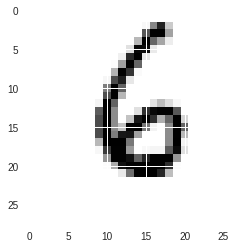

In [0]:
i = 90


plt.imshow(test_x[i].reshape(28,28))
np.argmax(y_pred[i])

In [0]:
max_y_pred =np.argmax(y_pred ,axis =1)



In [0]:

max_y_pred

array([2, 1, 0, ..., 4, 5, 6])

In [0]:
acc = np.equal(max_y_pred,test_y)
acc

array([ True,  True,  True, ...,  True,  True,  True])

In [0]:
np.mean(acc)

0.9942994299429943

In [0]:
# experimenting 
np.sum(np.equal([0,0,0,1],[0,0,10,20]).astype('int32'))/4 *100



50.0

In [0]:
error = []

for i in range(len(test_y)):
  if not acc[i]:
     error.append(i)                     

predicted value 3
actual value 5


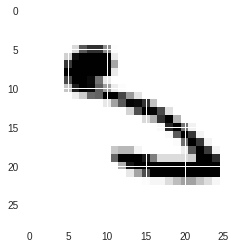

In [0]:
i = 10
print("predicted value {}".format(max_y_pred[error[i]]))
print("actual value {}".format(test_y[error[i]]))
plt.imshow(test_x[error[i]].reshape(28,28))

In [0]:
len(error)

57

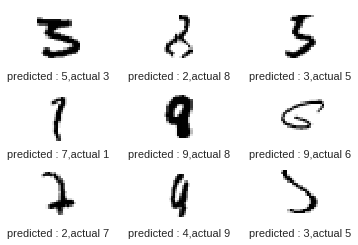

In [0]:

fig,axis = plt.subplots(3,3)

fig.subplots_adjust(hspace = 0.3,wspace  = 0.3)


for i,j in enumerate(axis.flat):
  
  j.imshow(test_x[error[i]].reshape(28,28) , cmap = 'binary')
  
  j.set_xlabel("predicted : {},actual {}".format(max_y_pred[error[i]],test_y[error[i]]))
  
  j.set_xticks([])
  j.set_yticks([])
  
plt.show()





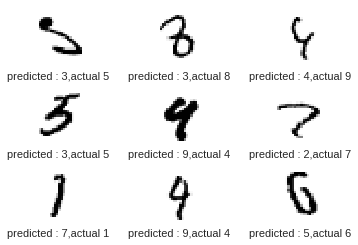

In [0]:

fig,axis = plt.subplots(3,3)

fig.subplots_adjust(hspace = 0.3,wspace  = 0.3)



for i,j in enumerate(axis.flat,10):
  
  j.imshow(test_x[error[i]].reshape(28,28))
  
  j.set_xlabel("predicted : {},actual {}".format(max_y_pred[error[i]],test_y[error[i]]))
  
  j.set_xticks([])
  j.set_yticks([])
  

plt.show()


[]

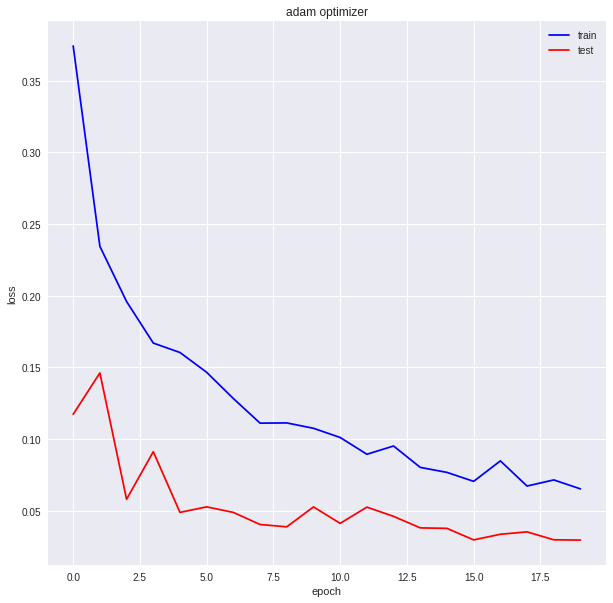

In [0]:
#plotting losss and accuracy

plt.figure(figsize=(10,10))
'''
plt.subplot(2,2,1)
plt.plot(hist1.history['loss'] , 'b')
plt.plot(hist1.history['val_loss'] , 'r')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title("simple loss")
plt.legend(['train', 'test'], loc='upper right')

plt.subplot(2,2,2)
plt.plot(hist2.history['loss'] , 'b')
plt.plot(hist2.history['val_loss'] , 'r')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.title("with dec. learning rate")

plt.subplot(2,2,3)
plt.plot(hist3.history['loss'] , 'b')
plt.plot(hist3.history['val_loss'] , 'r')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.title("with augmented data")
'''
plt.subplot(1,1,1)
plt.plot(hist4.history['loss'] , 'b')
plt.plot(hist4.history['val_loss'] , 'r')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.title("adam optimizer")
plt.plot()

In [0]:
print(model.outputs)
print(model.inputs)

[<tf.Tensor 'final_result/Sigmoid:0' shape=(?, 10) dtype=float32>]
[<tf.Tensor 'mul_input:0' shape=(?, 28, 28, 1) dtype=float32>]


In [0]:
import numpy as np
import tensorflow as tf


def freeze_session(session, keep_var_names=None, output_names=None, clear_devices=True):
    """
    Freezes the state of a session into a pruned computation graph.

    Creates a new computation graph where variable nodes are replaced by
    constants taking their current value in the session. The new graph will be
    pruned so subgraphs that are not necessary to compute the requested
    outputs are removed.
    @param session The TensorFlow session to be frozen.
    @param keep_var_names A list of variable names that should not be frozen,
                          or None to freeze all the variables in the graph.
    @param output_names Names of the relevant graph outputs.
    @param clear_devices Remove the device directives from the graph for better portability.
    @return The frozen graph definition.
    """
    
    session.run(tf.initialize_all_variables())
    graph = session.graph
    
    with graph.as_default():
        freeze_var_names = list(set(v.op.name for v in tf.global_variables()).difference(keep_var_names or []))
        print('freeze_var_names:',freeze_var_names)
        output_names = output_names or []
        output_names += [v.op.name for v in tf.global_variables()]
        input_graph_def = graph.as_graph_def()
        if clear_devices:
            for node in input_graph_def.node:
                node.device = ''
        frozen_graph = tf.graph_util.convert_variables_to_constants(
            session, input_graph_def, output_names, freeze_var_names)
        return frozen_graph




import keras
model.save('./counter_700.h5')

frozen_graph = freeze_session(keras.backend.get_session(), output_names=[out.op.name for out in model.outputs])
tf.train.write_graph(frozen_graph, './', 'counter_707.pbtxt', as_text=True)
tf.train.write_graph(frozen_graph, './', 'counter_707.pb', as_text=False)


freeze_var_names: ['training/SGD/Variable_2', 'training_1/Adam/Variable_27', 'batch_normalization_2/moving_mean', 'training_1/Adam/Variable_22', 'training_1/Adam/Variable_14', 'training_1/Adam/Variable_26', 'training_1/Adam/Variable_6', 'training_1/Adam/Variable_36', 'dense_1/bias', 'training_1/Adam/Variable_59', 'training_1/Adam/Variable_4', 'training_1/Adam/Variable_29', 'training_1/Adam/Variable', 'SGD/decay', 'training/SGD/Variable_5', 'training_1/Adam/Variable_52', 'training_1/Adam/Variable_32', 'final_result/kernel', 'training_1/Adam/Variable_19', 'SGD/lr', 'batch_normalization_1/beta', 'training/SGD/Variable_14', 'training/SGD/Variable_11', 'batch_normalization_3/beta', 'training/SGD/Variable_17', 'training/SGD/Variable_15', 'training/SGD/Variable_12', 'training/SGD/Variable_1', 'training_1/Adam/Variable_38', 'training_1/Adam/Variable_31', 'batch_normalization_2/moving_mean/biased', 'SGD/momentum', 'training/SGD/Variable_18', 'training_1/Adam/Variable_1', 'training_1/Adam/Variab

'./counter_707.pb'

In [0]:
print(model.inputs)
print(model.outputs)

[<tf.Tensor 'mul_input:0' shape=(?, 28, 28, 1) dtype=float32>]
[<tf.Tensor 'final_result/Sigmoid:0' shape=(?, 10) dtype=float32>]
